<a href="https://colab.research.google.com/github/ealexbarros/Machine-Learning-Projects/blob/master/ensemble_driver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from keras.utils import np_utils
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score,cross_validate
from sklearn import metrics
from sklearn.datasets import make_moons
from sklearn.metrics import accuracy_score,f1_score, recall_score,precision_score,roc_auc_score,mean_squared_error,roc_curve
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,ExtraTreesClassifier
from sklearn.preprocessing import LabelEncoder
import time as time
from sklearn.metrics import make_scorer
from sklearn.svm import LinearSVC
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score,ShuffleSplit
from keras.utils import np_utils
from sklearn.ensemble import VotingClassifier


Using TensorFlow backend.


In [0]:
# Step1: Create data set

data_url = "https://raw.githubusercontent.com/ealexbarros/Machine-Learning-Projects/master/Ensemble%20Learning/drivedb_final1.csv"
base = pd.read_csv(data_url)

In [0]:
base

,mean_q,mean_r,mean_s,stdev_q,stdev_r,stdev_s,qrs_interval,rr_interval,rq_amplitude,qrs_interval.1,person
0,-0.723496,0.278612,0.067206,0.014606,0.006745,0.003261,72.580645,780.241935,1.002108,72.580645,drive16
1,-0.745529,0.283174,0.074638,0.010212,0.008582,0.003838,72.580645,721.774194,1.028703,72.580645,drive16
2,-0.727950,0.281287,0.059535,0.011583,0.012637,0.012770,71.908602,687.500000,1.009237,71.908602,drive16
3,-0.505013,0.285457,-0.206507,0.323151,0.011784,0.373444,64.516129,655.241935,0.790470,64.516129,drive16
4,-0.285455,0.301478,-0.485068,0.350774,0.014207,0.382756,54.435484,635.080645,0.586933,54.435484,drive16
...,...,...,...,...,...,...,...,...,...,...,...
26595,-0.796856,1.004739,-0.179860,0.066082,0.103765,0.125639,55.443548,623.991935,1.801595,55.443548,drive01
26596,-0.706270,0.942474,-0.271047,0.023319,0.069515,0.017781,60.147849,556.451613,1.648744,60.147849,drive01
26597,-0.697754,0.921037,-0.266242,0.010162,0.036736,0.014690,59.475806,653.225806,1.618791,59.475806,drive01
26598,-0.731650,1.002127,-0.305096,0.051388,0.050148,0.005644,60.819892,692.540323,1.733777,60.819892,drive01


In [0]:

base_cleaned = base.dropna()


In [0]:
base_cleaned

,mean_q,mean_r,mean_s,stdev_q,stdev_r,stdev_s,qrs_interval,rr_interval,rq_amplitude,qrs_interval.1,person
0,-0.723496,0.278612,0.067206,0.014606,0.006745,0.003261,72.580645,780.241935,1.002108,72.580645,drive16
1,-0.745529,0.283174,0.074638,0.010212,0.008582,0.003838,72.580645,721.774194,1.028703,72.580645,drive16
2,-0.727950,0.281287,0.059535,0.011583,0.012637,0.012770,71.908602,687.500000,1.009237,71.908602,drive16
3,-0.505013,0.285457,-0.206507,0.323151,0.011784,0.373444,64.516129,655.241935,0.790470,64.516129,drive16
4,-0.285455,0.301478,-0.485068,0.350774,0.014207,0.382756,54.435484,635.080645,0.586933,54.435484,drive16
...,...,...,...,...,...,...,...,...,...,...,...
26595,-0.796856,1.004739,-0.179860,0.066082,0.103765,0.125639,55.443548,623.991935,1.801595,55.443548,drive01
26596,-0.706270,0.942474,-0.271047,0.023319,0.069515,0.017781,60.147849,556.451613,1.648744,60.147849,drive01
26597,-0.697754,0.921037,-0.266242,0.010162,0.036736,0.014690,59.475806,653.225806,1.618791,59.475806,drive01
26598,-0.731650,1.002127,-0.305096,0.051388,0.050148,0.005644,60.819892,692.540323,1.733777,60.819892,drive01


In [0]:
base=base_cleaned
X = base.iloc[:,0:10].values #ao colocar 1:2, o iloc retorna somente a coluna 1
y = base.iloc[:,10:11].values #ao colocar 1:2, o iloc retorna somente a coluna 1

In [0]:

# Step2: Spliting in train and test files

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

cv = ShuffleSplit(n_splits=10, random_state=0)
#Linear Regression
#lm = linear_model.LinearRegression()
#model = lm.fit(X_train, y_train)
#y_pred = lm.predict(X_test)
#accuracy_score(y_test, y_pred)

In [0]:
# Step 3: Fit a Decision Tree model as comparison
#Using cross-validation
clf = DecisionTreeClassifier()
resultados = cross_val_score(estimator = clf,
                             X = X, y = y,
                             cv = cv, scoring = 'accuracy')

media = resultados.mean()
desvio = resultados.std()
#getting metrics


In [0]:

start = time.time()
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
end = time.time()
y_pred = clf.predict(X_test)
acc=accuracy_score(y_test, y_pred)
f1=f1_score(y_test, y_pred, average='macro')
recall=recall_score(y_test, y_pred, average='macro')
precision=precision_score(y_test, y_pred, average='macro')
#roc=roc_auc_score(y_test, y_pred)
metrics_DT =[(end-start),media, desvio,acc,f1,recall,precision]
print(metrics_DT)


[0.28552746772766113, 0.8310614962788876, 0.007363573094683877, 0.833268050659355, 0.8326651205022728, 0.8331348319628357, 0.8323177668902997]


In [0]:
# Step 3: Fit a Random Forest Model model as comparison
#Using cross-validation
clf = RandomForestClassifier(n_estimators=200, max_depth=100, min_samples_leaf=3, min_samples_split=10, n_jobs=-1)
resultados = cross_val_score(estimator = clf,
                             X = X, y = y,
                             cv = cv, scoring = 'accuracy')
media = resultados.mean()
desvio = resultados.std()


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

In [0]:
#getting metrics
start = time.time()
clf = RandomForestClassifier(n_estimators=200, max_depth=100, min_samples_leaf=3, min_samples_split=10, n_jobs=-1)
clf.fit(X_train, y_train)
end = time.time()
y_pred = clf.predict(X_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
acc=accuracy_score(y_test, y_pred)
f1=f1_score(y_test, y_pred, average='macro')
recall=recall_score(y_test, y_pred, average='macro')
precision=precision_score(y_test, y_pred, average='macro')
#roc=roc_auc_score(y_test, y_pred,multi_class='ovr')
#msq= roc_curve(y_test, y_pred)
metrics_RF=[(end-start),media, desvio,acc,f1,recall,precision]
print(metrics_RF)

[3.6919546127319336, 0.8835095965530748, 0.006967787111808959, 0.8815772294033164, 0.8810483583879948, 0.8813104006039806, 0.881213108081593]


In [0]:
metrics_RF[2]

0.006967787111808959

In [0]:
# Step 3: Fit a ExtraTreesClassifier Model model as comparison
#Using cross-validation
clf = ExtraTreesClassifier(n_estimators=100, max_features="auto",random_state=0)
resultados = cross_val_score(estimator = clf,
                             X = X, y = y,
                             cv = cv, scoring = 'accuracy')
media = resultados.mean()
desvio = resultados.std()
print(media,desvio)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

0.8911868390129261 0.006632976689619872


In [0]:

#getting metrics
start = time.time()
clf = ExtraTreesClassifier(n_estimators=100, max_features="auto",random_state=0)
clf.fit(X_train, y_train)
end = time.time()
y_pred = clf.predict(X_test)
acc=accuracy_score(y_test, y_pred)
f1=f1_score(y_test, y_pred, average='macro')
recall=recall_score(y_test, y_pred, average='macro')
precision=precision_score(y_test, y_pred, average='macro')
metrics_extra=[(end-start),media, desvio,acc,f1,recall,precision]
print(metrics_extra)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


[1.326235294342041, 0.8911868390129261, 0.006632976689619872, 0.8883666274970623, 0.8877073365229915, 0.888150936017449, 0.887827169392853]


In [0]:
#plt.scatter(['mean_acc_cv','std','acc_test','f1','recall','precision'], [media, desvio,acc,f1,recall,precision]) #Criando o gráfico
#plt.title(metrics[0]) #adicionando o título
#plt.xlabel('Metrics')
#plt.ylabel('Results')
#plt.show()

In [0]:
# Step 4: Fit a AdaBoost model,
#clf = AdaBoostClassifier(n_estimators=100)
#resultados = cross_val_score(estimator = clf,
#                             X = X, y = y,
#                             cv = cv, scoring = 'accuracy')
#media = resultados.mean()
#desvio = resultados.std()
#print(media,desvio)

In [0]:

#getting metrics
#start = time.time()
#clf = AdaBoostClassifier(n_estimators=100)
#clf.fit(X_train, y_train)
#end = time.time()
#y_pred = clf.predict(X_test)
#acc=accuracy_score(y_test, y_pred)
#f1=f1_score(y_test, y_pred, average='macro')
#recall=recall_score(y_test, y_pred, average='macro')
#precision=precision_score(y_test, y_pred, average='macro')
#roc=roc_auc_score(y_test, y_pred,multi_class='ovr')
#metrics_Ada=[(end-start),media, desvio,acc,f1,recall,precision]
#print(metrics)

In [0]:
# Step 5: Fit a Gradient Boosting model, " compared to "Decision Tree model, accuracy go up by 10%
#clf = GradientBoostingClassifier(n_estimators=100)
#resultados = cross_val_score(estimator = clf,
 #                            X = X, y = y,
#                           cv = cv, scoring = 'accuracy')
#media = resultados.mean()
#desvio = resultados.std()


In [0]:

#getting metrics

#start = time.time()
#clf = GradientBoostingClassifier(n_estimators=100)
#clf.fit(X_train, y_train)
#end = time.time()
#y_pred = clf.predict(X_test)
#acc=accuracy_score(y_test, y_pred)
#f1=f1_score(y_test, y_pred, average='macro')
#recall=recall_score(y_test, y_pred, average='macro')
#precision=precision_score(y_test, y_pred, average='macro')
#roc=roc_auc_score(y_test, y_pred,multi_class='ovr')
#metrics_Grad=['GradientBoosting',(end-start),media, desvio,acc,f1,recall,precision]
#print(metrics_Grad)

In [0]:
#plt.scatter(['mean_acc_cv','std','acc_test','f1','recall','precision'], [media, desvio,acc,f1,recall,precision]) #Criando o gráfico
#plt.title(metrics[0]) #adicionando o título
#plt.xlabel('Metrics')
#plt.ylabel('Results')
#plt.show()

In [0]:
#SVM
# Step 6: Fit a Linear SVM
clf = LinearSVC(random_state=0, tol=1e-5, dual=False,)
resultados = cross_val_score(estimator = clf,
                             X = X, y = y,
                             cv = cv, scoring = 'accuracy')
media = resultados.mean()
desvio = resultados.std()


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [0]:

#getting metrics
start = time.time()
clf = LinearSVC(random_state=0, tol=1e-5, dual=False,)
clf.fit(X_train, y_train)
end = time.time()
y_pred = clf.predict(X_test)
acc=accuracy_score(y_test, y_pred)
f1=f1_score(y_test, y_pred, average='macro')
recall=recall_score(y_test, y_pred, average='macro')
precision=precision_score(y_test, y_pred, average='macro')
#roc=roc_auc_score(y_test, y_pred,multi_class='ovr')
metrics_SVM=[(end-start),media, desvio,acc,f1,recall,precision]
print(metrics_SVM)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[1.0496747493743896, 0.6950254602428515, 0.005922775768565877, 0.699177438307873, 0.6733338319474023, 0.6974269437082571, 0.6807495871733258]


In [0]:
#step 7: votingrnd_clf = RandomForestClassifier()
metrics2=[]
dt_clf = DecisionTreeClassifier()
rnd_clf = RandomForestClassifier(n_estimators=100, max_features="auto",random_state=0)
ext_clf = ExtraTreesClassifier(n_estimators=100, max_features="auto",random_state=0)
voting_clf = VotingClassifier(
        estimators=[('lr', dt_clf), ('rf', rnd_clf), ('ext', ext_clf)],
        voting='hard')
voting_clf.fit(X_train, y_train)
for clf in (dt_clf, rnd_clf, ext_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    #metrics2.append(accuracy_score(y_test, y_pred))
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

acc=accuracy_score(y_test, y_pred)
f1=f1_score(y_test, y_pred, average='macro')
recall=recall_score(y_test, y_pred, average='macro')
precision=precision_score(y_test, y_pred, average='macro')
#roc=roc_auc_score(y_test, y_pred,multi_class='ovr')
metrics_voting=[(end-start),media, desvio,acc,f1,recall,precision]

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


DecisionTreeClassifier 0.8341820080950516


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


RandomForestClassifier 0.8865387126256692


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


ExtraTreesClassifier 0.8883666274970623


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


VotingClassifier 0.8884971928450189


In [0]:
#step 7: votingrnd_clf = RandomForestClassifier()
metrics2=[]
dt_clf = DecisionTreeClassifier()
rnd_clf = RandomForestClassifier(n_estimators=100, max_features="auto",random_state=0)
ext_clf = ExtraTreesClassifier(n_estimators=100, max_features="auto",random_state=0)
voting_clf = VotingClassifier(
        estimators=[('lr', dt_clf), ('rf', rnd_clf), ('ext', ext_clf)],
        voting='soft')
voting_clf.fit(X_train, y_train)
for clf in (dt_clf, rnd_clf, ext_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    #metrics2.append(accuracy_score(y_test, y_pred))
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

acc=accuracy_score(y_test, y_pred)
f1=f1_score(y_test, y_pred, average='macro')
recall=recall_score(y_test, y_pred, average='macro')
precision=precision_score(y_test, y_pred, average='macro')
#roc=roc_auc_score(y_test, y_pred,multi_class='ovr')
metrics_voting_soft=[(end-start),media, desvio,acc,f1,recall,precision]

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


DecisionTreeClassifier 0.833659746703225


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


RandomForestClassifier 0.8865387126256692


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


ExtraTreesClassifier 0.8883666274970623


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


VotingClassifier 0.8563781172476824


In [0]:
#plt.scatter(['mean_acc_cv','std','acc_test','f1','recall','precision'], [media, desvio,acc,f1,recall,precision]) #Criando o gráfico
#plt.title(metrics[0]) #adicionando o título
#plt.xlabel('Metrics')
#plt.ylabel('Results')
#plt.show()

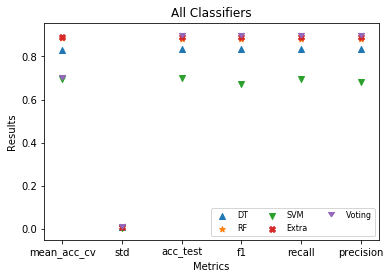

In [0]:
dt=plt.scatter(['mean_acc_cv','std','acc_test','f1','recall','precision'], [metrics_DT[1], metrics_DT[2],metrics_DT[3],metrics_DT[4],metrics_DT[5],metrics_DT[6]],
            label='DT',marker='^') #Criando o gráfico
rf=plt.scatter(['mean_acc_cv','std','acc_test','f1','recall','precision'], [metrics_RF[1], metrics_RF[2],metrics_RF[3],metrics_RF[4],metrics_RF[5],metrics_RF[6]],
            label='RF',marker='*') #Criando o gráfico
svm=plt.scatter(['mean_acc_cv','std','acc_test','f1','recall','precision'], [metrics_SVM[1], metrics_SVM[2],metrics_SVM[3],metrics_SVM[4],metrics_SVM[5],metrics_SVM[6]],
            label='SVM', marker='v') #Criando o gráfico
extra=plt.scatter(['mean_acc_cv','std','acc_test','f1','recall','precision'], [metrics_extra[1], metrics_extra[2],metrics_extra[3],metrics_extra[4],metrics_extra[5],metrics_extra[6]],
            label='Voting',marker='X') #Criando o gráfico
voting= plt.scatter(['mean_acc_cv','std','acc_test','f1','recall','precision'], [metrics_voting[1], metrics_voting[2],metrics_voting[3],metrics_voting[4],metrics_voting[5],metrics_voting[6]],
            label='Voting',marker=7) #Criando o gráfico
plt.legend((dt, rf,svm,extra,voting),
           ('DT', 'RF','SVM','Extra','Voting'),
           scatterpoints=1,
           loc='lower right',
           ncol=3,
           fontsize=8)
plt.title('All Classifiers') #adicionando o título
plt.xlabel('Metrics')
plt.ylabel('Results')
plt.show()

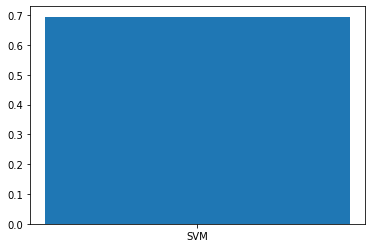

In [0]:
plt.bar('SVM', metrics_SVM[1])
plt.show()

<BarContainer object of 4 artists>

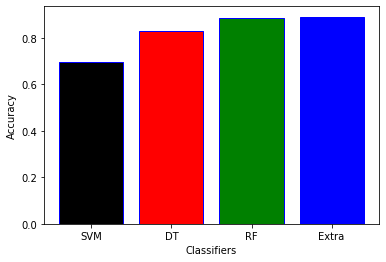

In [0]:
classifiers=('SVM','DT','RF','Extra')
results = [metrics_SVM[1],metrics_DT[1], metrics_RF[1], metrics_extra[1]]
plt.ylabel("Accuracy")
plt.xlabel("Classifiers")
plt.bar(classifiers, results, color=['black', 'red', 'green', 'blue', 'cyan'],edgecolor='blue')


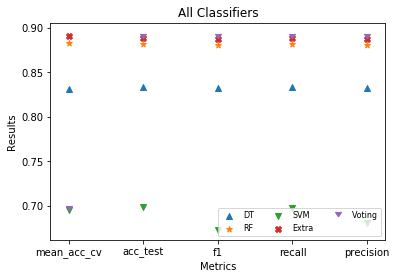

In [0]:
dt=plt.scatter(['mean_acc_cv','acc_test','f1','recall','precision'], [metrics_DT[1],metrics_DT[3],metrics_DT[4],metrics_DT[5],metrics_DT[6]],
            label='DT',marker='^') #Criando o gráfico
rf=plt.scatter(['mean_acc_cv','acc_test','f1','recall','precision'], [metrics_RF[1],metrics_RF[3],metrics_RF[4],metrics_RF[5],metrics_RF[6]],
            label='RF',marker='*') #Criando o gráfico
svm=plt.scatter(['mean_acc_cv','acc_test','f1','recall','precision'], [metrics_SVM[1],metrics_SVM[3],metrics_SVM[4],metrics_SVM[5],metrics_SVM[6]],
            label='SVM', marker='v') #Criando o gráfico
extra=plt.scatter(['mean_acc_cv','acc_test','f1','recall','precision'], [metrics_extra[1],metrics_extra[3],metrics_extra[4],metrics_extra[5],metrics_extra[6]],
            label='Voting',marker='X') #Criando o gráfico
voting= plt.scatter(['mean_acc_cv','acc_test','f1','recall','precision'], [metrics_voting[1],metrics_voting[3],metrics_voting[4],metrics_voting[5],metrics_voting[6]],
            label='Voting',marker=7) #Criando o gráfico
plt.legend((dt, rf,svm,extra,voting),
           ('DT', 'RF','SVM','Extra','Voting'),
           scatterpoints=1,
           loc='lower right',
           ncol=3,
           fontsize=8)
plt.title('All Classifiers') #adicionando o título
plt.xlabel('Metrics')
plt.ylabel('Results')
plt.show()

In [0]:
# Step 7: Fit a Neural Network

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
classe_encoder = labelencoder.fit_transform(y)
classe_dummy = np_utils.to_categorical(classe_encoder)
previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(X, classe_dummy, test_size=0.2)
#input_dim=atributos previsores
start = time.time()
classificador = Sequential()
classificador.add(Dense(units = 12, activation = 'relu', input_dim = 10))
classificador.add(Dense(units = 12, activation = 'relu'))
classificador.add(Dense(units = 12, activation = 'relu'))
classificador.add(Dense(units = 12, activation = 'relu'))
classificador.add(Dense(units = 12, activation = 'relu'))
classificador.add(Dense(units = 14, activation = 'softmax'))
classificador.compile(optimizer = 'adam', loss = 'categorical_crossentropy',
                      metrics = ['categorical_accuracy'])
classificador.fit(previsores_treinamento, classe_treinamento, batch_size = 1000,
                  epochs = 1000)
end = time.time()
resultado = classificador.evaluate(previsores_teste, classe_teste)
previsoes = classificador.predict(previsores_teste)
acc=accuracy_score(y_test, y_pred)
f1=f1_score(y_test, y_pred, average='macro')
recall=recall_score(y_test, y_pred, average='macro')
precision=precision_score(y_test, y_pred, average='macro')
#roc=roc_auc_score(y_test, y_pred,multi_class='ovr')
metrics_neural=[(end-start),media, desvio,acc,f1,recall,precision]
print(metrics_neural)






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)





Epoch 1/1000





20424/20424 [==============================] - 9s 461us/step - loss: 13.7583 - categorical_accuracy: 0.0758
Epoch 2/1000
20424/20424 [==============================] - 0s 4us/step - loss: 11.9903 - categorical_accuracy: 0.0867
Epoch 3/1000
20424/20424 [==============================] - 0s 4us/step - loss: 11.0456 - categorical_accuracy: 0.0754
Epoch 4/1000
20424/20424 [==============================] - 0s 4us/step - loss: 10.9031 - categorical_accuracy: 0.0924
Epoch 5/1000
20424/20424 [==============================] - 0s 4us/step - loss: 10.5471 - categorical_accuracy: 0.0958
Epoch 6/1000
20424/20424 [==============================] - 0s 4us/step - loss: 9.1629 - categorical_accuracy: 0.0771
Epoch 7/1000
20424/20424 [==============================] - 0s 4us/step - loss: 8.9883 - categorical_accuracy: 0.0926
Epoch 8/1000
20424/20424 [==============================] - 0s 4us/step - loss: 8.9700 - categorical_accuracy: 0.0734
Epoch 9/1000
20424/20424 [===============

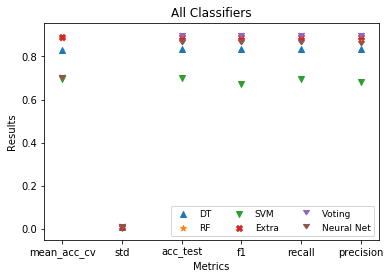

In [0]:
dt=plt.scatter(['mean_acc_cv','std','acc_test','f1','recall','precision'], [metrics_DT[1], metrics_DT[2],metrics_DT[3],metrics_DT[4],metrics_DT[5],metrics_DT[6]],
            label='DT',marker='^') #Criando o gráfico
rf=plt.scatter(['mean_acc_cv','std','acc_test','f1','recall','precision'], [metrics_RF[1], metrics_RF[2],metrics_RF[3],metrics_RF[4],metrics_RF[5],metrics_RF[6]],
            label='RF',marker='*') #Criando o gráfico
svm=plt.scatter(['mean_acc_cv','std','acc_test','f1','recall','precision'], [metrics_SVM[1], metrics_SVM[2],metrics_SVM[3],metrics_SVM[4],metrics_SVM[5],metrics_SVM[6]],
            label='SVM', marker='v') #Criando o gráfico
extra=plt.scatter(['mean_acc_cv','std','acc_test','f1','recall','precision'], [metrics_extra[1], metrics_extra[2],metrics_extra[3],metrics_extra[4],metrics_extra[5],metrics_extra[6]],
            label='Voting',marker='X') #Criando o gráfico
voting= plt.scatter(['mean_acc_cv','std','acc_test','f1','recall','precision'], [metrics_voting[1], metrics_voting[2],metrics_voting[3],metrics_voting[4],metrics_voting[5],metrics_voting[6]],
            label='Voting',marker=7) #Criando o gráfico
neural= plt.scatter(['mean_acc_cv','std','acc_test','f1','recall','precision'], [metrics_neural[1], metrics_neural[2],metrics_neural[3],metrics_neural[4],metrics_neural[5],metrics_neural[6]],
            label='Voting',marker=7) #Criando o gráfico            
plt.legend((dt, rf,svm,extra,voting, neural),
           ('DT', 'RF','SVM','Extra','Voting','Neural Net'),
           scatterpoints=1,
           loc='lower right',
           ncol=3,
           fontsize=9)
plt.title('All Classifiers') #adicionando o título
plt.xlabel('Metrics')
plt.ylabel('Results')
plt.show()

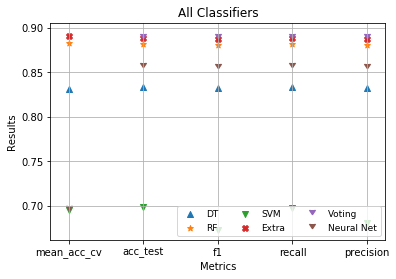

In [0]:
dt=plt.scatter(['mean_acc_cv','acc_test','f1','recall','precision'], [metrics_DT[1],metrics_DT[3],metrics_DT[4],metrics_DT[5],metrics_DT[6]],
            label='DT',marker='^') #Criando o gráfico
rf=plt.scatter(['mean_acc_cv','acc_test','f1','recall','precision'], [metrics_RF[1],metrics_RF[3],metrics_RF[4],metrics_RF[5],metrics_RF[6]],
            label='RF',marker='*') #Criando o gráfico
svm=plt.scatter(['mean_acc_cv','acc_test','f1','recall','precision'], [metrics_SVM[1],metrics_SVM[3],metrics_SVM[4],metrics_SVM[5],metrics_SVM[6]],
            label='SVM', marker='v') #Criando o gráfico
extra=plt.scatter(['mean_acc_cv','acc_test','f1','recall','precision'], [metrics_extra[1],metrics_extra[3],metrics_extra[4],metrics_extra[5],metrics_extra[6]],
            label='Voting',marker='X') #Criando o gráfico
voting= plt.scatter(['mean_acc_cv','acc_test','f1','recall','precision'], [metrics_voting[1],metrics_voting[3],metrics_voting[4],metrics_voting[5],metrics_voting[6]],
            label='Voting',marker=7) #Criando o gráfico
neural= plt.scatter(['mean_acc_cv','acc_test','f1','recall','precision'], [metrics_neural[1],metrics_neural[3],metrics_neural[4],metrics_neural[5],metrics_neural[6]],
            label='Voting',marker=7) #Criando o gráfico            
plt.legend((dt, rf,svm,extra,voting, neural),
           ('DT', 'RF','SVM','Extra','Voting','Neural Net'),
           scatterpoints=1,
           loc='lower right',
           ncol=3,
           fontsize=9)
plt.title('All Classifiers') #adicionando o título
plt.xlabel('Metrics')
plt.ylabel('Results')
plt.grid(True)
plt.show()

In [0]:
previsoes_original=previsoes
previsoes = (previsoes > 0.5)
print(end-start)
import numpy as np
classe_teste2 = [np.argmax(t) for t in classe_teste]
previsoes2 = [np.argmax(t) for t in previsoes]

from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(previsoes2, classe_teste2)

93.68516254425049


In [0]:
metrics_DT

[0.28552746772766113,
 0.8310614962788876,
 0.007363573094683877,
 0.833268050659355,
 0.8326651205022728,
 0.8331348319628357,
 0.8323177668902997]

In [0]:
metrics_RF

[3.6919546127319336,
 0.8835095965530748,
 0.006967787111808959,
 0.8815772294033164,
 0.8810483583879948,
 0.8813104006039806,
 0.881213108081593]

In [0]:
metrics_extra

[1.326235294342041,
 0.8911868390129261,
 0.006632976689619872,
 0.8883666274970623,
 0.8877073365229915,
 0.888150936017449,
 0.887827169392853]

In [0]:
metrics_SVM

[1.0496747493743896,
 0.6950254602428515,
 0.005922775768565877,
 0.699177438307873,
 0.6733338319474023,
 0.6974269437082571,
 0.6807495871733258]

In [0]:
metrics_voting

[1.0496747493743896,
 0.6950254602428515,
 0.005922775768565877,
 0.8884971928450189,
 0.8880932031157479,
 0.8882822472046679,
 0.8882095912057577]

In [0]:
metrics_neural

[93.68516254425049,
 0.6950254602428515,
 0.005922775768565877,
 0.8563781172476824,
 0.855406249600356,
 0.8563247160155626,
 0.8547921598027515]

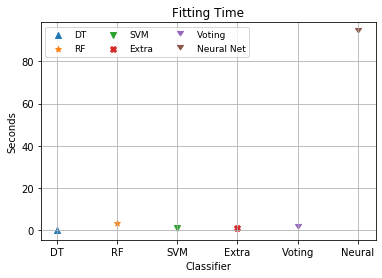

In [0]:
dt=plt.scatter(['DT'], [metrics_DT[0]],
            label='DT',marker='^') #Criando o gráfico
rf=plt.scatter(['RF'], [metrics_RF[0]],
            label='RF',marker='*') #Criando o gráfico
svm=plt.scatter(['SVM'], [metrics_SVM[0]],
            label='SVM', marker='v') #Criando o gráfico
extra=plt.scatter(['Extra'], [metrics_extra[0]],
            label='Extra',marker='X') #Criando o gráfico
voting= plt.scatter(['Voting'], [metrics_voting[0]],
            label='Voting',marker=7) #Criando o gráfico
neural= plt.scatter(['Neural'], [metrics_neural[0]],
            label='Neural',marker=7) #Criando o gráfico            
plt.legend((dt, rf,svm,extra,voting, neural),
           ('DT', 'RF','SVM','Extra','Voting','Neural Net'),
           scatterpoints=1,
           loc='upper left',
           ncol=3,
           fontsize=9)
plt.title('Fitting Time') #adicionando o título
plt.xlabel('Classifier')
plt.ylabel('Seconds')
plt.grid(True)
plt.show()

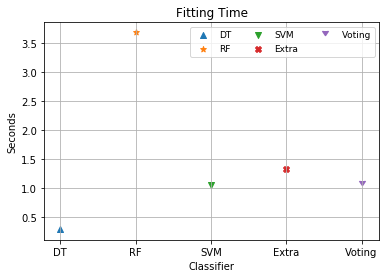

In [0]:
dt=plt.scatter(['DT'], [metrics_DT[0]],
            label='DT',marker='^') #Criando o gráfico
rf=plt.scatter(['RF'], [metrics_RF[0]],
            label='RF',marker='*') #Criando o gráfico
svm=plt.scatter(['SVM'], [metrics_SVM[0]],
            label='SVM', marker='v') #Criando o gráfico
extra=plt.scatter(['Extra'], [metrics_extra[0]],
            label='Extra',marker='X') #Criando o gráfico
voting= plt.scatter(['Voting'], [metrics_voting[0]],
            label='Voting',marker=7) #Criando o gráfico        
plt.legend((dt, rf,svm,extra,voting, neural),
           ('DT', 'RF','SVM','Extra','Voting'),
           scatterpoints=1,
           loc='upper right',
           ncol=3,
           fontsize=9)
plt.title('Fitting Time') #adicionando o título
plt.xlabel('Classifier')
plt.ylabel('Seconds')
plt.grid(True)
plt.show()

<BarContainer object of 7 artists>

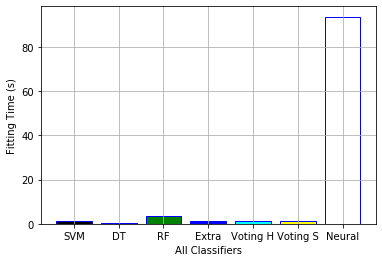

In [0]:
classifiers=('SVM','DT','RF','Extra', 'Voting H', 'Voting S','Neural')
results = [metrics_SVM[0],metrics_DT[0], metrics_RF[0], metrics_extra[0], metrics_voting[0],metrics_voting_soft[0], metrics_neural[0]]
plt.ylabel("Fitting Time (s)")
plt.xlabel("All Classifiers")
plt.grid(True)
plt.bar(classifiers, results, color=['black', 'red', 'green', 'blue', 'cyan', 'yellow', 'white'],edgecolor='blue')


<BarContainer object of 6 artists>

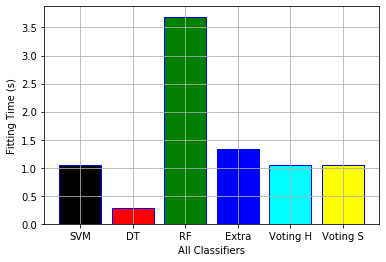

In [0]:
classifiers=('SVM','DT','RF','Extra', 'Voting H', 'Voting S')
results = [metrics_SVM[0],metrics_DT[0], metrics_RF[0], metrics_extra[0], metrics_voting[0],metrics_voting_soft[0]]
plt.ylabel("Fitting Time (s)")
plt.xlabel("All Classifiers")
plt.grid(True)
plt.bar(classifiers, results, color=['black', 'red', 'green', 'blue', 'cyan', 'yellow', 'white'],edgecolor='blue')


<BarContainer object of 4 artists>

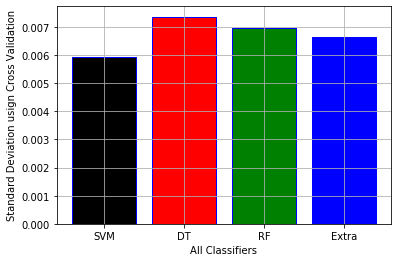

In [0]:
classifiers=('SVM','DT','RF','Extra')
results = [metrics_SVM[2],metrics_DT[2], metrics_RF[2], metrics_extra[2]]
plt.ylabel("Standard Deviation usign Cross Validation")
plt.xlabel("All Classifiers")
plt.grid(True)
plt.bar(classifiers, results, color=['black', 'red', 'green', 'blue', 'cyan', 'yellow', 'white'],edgecolor='blue')


In [0]:
classifiers=('SVM','DT','RF','Extra')
results = [metrics_SVM[2],metrics_DT[2], metrics_RF[2], metrics_extra[2]]
plt.ylabel("Standard Deviation usign Cross Validation")
plt.xlabel("All Classifiers")
plt.grid(True)
plt.bar(classifiers, results, color=['black', 'red', 'green', 'blue', 'cyan', 'yellow', 'white'],edgecolor='blue')


<BarContainer object of 7 artists>

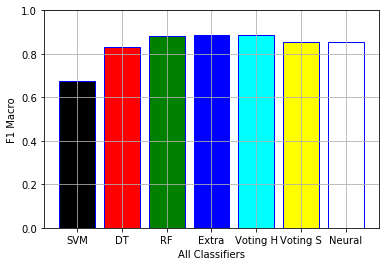

In [0]:
classifiers=('SVM','DT','RF','Extra','Voting H', 'Voting S','Neural')
results = [metrics_SVM[4],metrics_DT[4], metrics_RF[4], metrics_extra[4], metrics_voting[4],metrics_voting_soft[4], metrics_neural[4]]
plt.ylabel("F1 Macro")
plt.xlabel("All Classifiers")
plt.grid(True)
plt.ylim([0,1])

plt.bar(classifiers, results, color=['black', 'red', 'green', 'blue', 'cyan', 'yellow', 'white'],edgecolor='blue')


<BarContainer object of 7 artists>

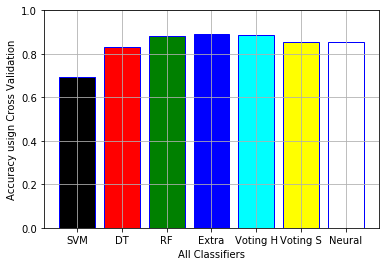

In [0]:
classifiers=('SVM','DT','RF','Extra','Voting H', 'Voting S','Neural')
results = [metrics_SVM[1],metrics_DT[1], metrics_RF[1], metrics_extra[1], metrics_voting[3],metrics_voting_soft[3], metrics_neural[3]]
plt.ylabel("Accuracy usign Cross Validation")
plt.xlabel("All Classifiers")
plt.grid(True)
plt.ylim([0,1])

plt.bar(classifiers, results, color=['black', 'red', 'green', 'blue', 'cyan', 'yellow', 'white'],edgecolor='blue')


<BarContainer object of 7 artists>

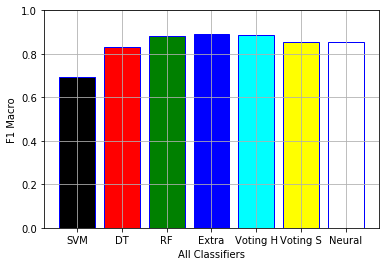

In [0]:
classifiers=('SVM','DT','RF','Extra','Voting H', 'Voting S','Neural')
results = [metrics_SVM[1],metrics_DT[1], metrics_RF[1], metrics_extra[1], metrics_voting[3],metrics_voting_soft[3], metrics_neural[3]]
plt.ylabel("F1 Macro")
plt.xlabel("All Classifiers")
plt.grid(True)
plt.ylim([0,1])
plt.bar(classifiers, results, color=['black', 'red', 'green', 'blue', 'cyan', 'yellow', 'white'],edgecolor='blue')


<BarContainer object of 7 artists>

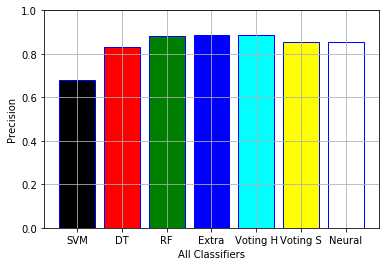

In [0]:
classifiers=('SVM','DT','RF','Extra','Voting H', 'Voting S','Neural')
results = [metrics_SVM[6],metrics_DT[6], metrics_RF[6], metrics_extra[6], metrics_voting[6],metrics_voting_soft[6], metrics_neural[6]]
plt.ylabel("Precision")
plt.xlabel("All Classifiers")
plt.grid(True)
plt.ylim([0,1])


plt.bar(classifiers, results, color=['black', 'red', 'green', 'blue', 'cyan', 'yellow', 'white'],edgecolor='blue')


In [0]:
metrics_SVM[0]

1.0496747493743896

<BarContainer object of 7 artists>

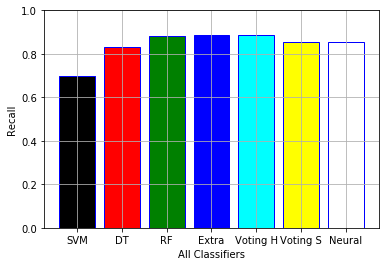

In [0]:
classifiers=('SVM','DT','RF','Extra','Voting H', 'Voting S','Neural')
results = [metrics_SVM[5],metrics_DT[5], metrics_RF[5], metrics_extra[5], metrics_voting[5],metrics_voting_soft[5], metrics_neural[5]]
plt.ylabel("Recall")
plt.xlabel("All Classifiers")
plt.grid(True)
plt.ylim([0,1])

plt.bar(classifiers, results, color=['black', 'red', 'green', 'blue', 'cyan', 'yellow', 'white'],edgecolor='blue')
